# Data Workflow 

## Widget n°5 

#### Required libraires

In [ ]:
!pip install pandas matplotlib ipywidgets

     ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
     ---------- -------------------------- 41.0/139.8 kB 991.0 kB/s eta 0:00:01
     ---------------- -------------------- 61.4/139.8 kB 825.8 kB/s eta 0:00:01
     ------------------------ ------------ 92.2/139.8 kB 655.4 kB/s eta 0:00:01
     ---------------------------------- - 133.1/139.8 kB 787.7 kB/s eta 0:00:01
     ------------------------------------ 139.8/139.8 kB 692.9 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
      --------------------------------------- 0.0/2.2 MB 960.0 kB/s eta 0:00:03
      --------------------------------------- 0.1/2.2 MB 650.2 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.2 MB 558.5 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.2 MB 595.3 kB/s eta 0:00:04
     -- ------------------------------------- 0.1/2.2 MB 607.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.2 MB


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import random
import plotly.express as px
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

### Data Collection

Consulter le fichier `data/source.md` pour savoir lequelles sont disponibles

#### Load data

In [ ]:
path_input = input("Enter your input data path.")
if not path_input:
    path_input = "../data/donnees_immobilieres.csv"

In [ ]:
data = pd.read_csv(path_input)

In [ ]:
print(data.head())

                    commune  departement   latitude  longitude    type_bien  \
0           Rosny-sous-Bois           93  48.873971   2.484808  Appartement   
1  Paris 20e Arrondissement           75  48.857495   2.406804  Appartement   
2   Paris 5e Arrondissement           75  48.851482   2.347632  Appartement   
3                    Lisses           91  48.600538   2.422382  Appartement   
4                   Jouarre           77  48.914167   3.146526       Maison   

   surface_m2  prix_total   prix_m2  annee date_transaction     etat  \
0        45.0    204900.0   4553.33   2022       2022-05-19  Inconnu   
1        27.0    218000.0   8074.07   2021       2021-04-15  Inconnu   
2        40.0    860000.0  21500.00   2021       2021-08-12  Inconnu   
3        83.0    212382.0   2558.82   2023       2023-08-04  Inconnu   
4        75.0    167200.0   2229.33   2022       2022-09-21  Inconnu   

   cout_renovation_m2_estime  
0                          0  
1                          0  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   commune                    50000 non-null  object 
 1   departement                50000 non-null  int64  
 2   latitude                   50000 non-null  float64
 3   longitude                  50000 non-null  float64
 4   type_bien                  50000 non-null  object 
 5   surface_m2                 50000 non-null  float64
 6   prix_total                 50000 non-null  float64
 7   prix_m2                    50000 non-null  float64
 8   annee                      50000 non-null  int64  
 9   date_transaction           50000 non-null  object 
 10  etat                       50000 non-null  object 
 11  cout_renovation_m2_estime  50000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 4.6+ MB


In [ ]:
data["commune"] = data["commune"].astype('string')
# data["type_bien"] = data["type_bien"].astype('category')
data["date_transaction"] = pd.to_datetime(data["date_transaction"], format="%Y-%m-%d")
# data["etat"] = data["etat"].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   commune                    50000 non-null  string        
 1   departement                50000 non-null  int64         
 2   latitude                   50000 non-null  float64       
 3   longitude                  50000 non-null  float64       
 4   type_bien                  50000 non-null  object        
 5   surface_m2                 50000 non-null  float64       
 6   prix_total                 50000 non-null  float64       
 7   prix_m2                    50000 non-null  float64       
 8   annee                      50000 non-null  int64         
 9   date_transaction           50000 non-null  datetime64[ns]
 10  etat                       50000 non-null  object        
 11  cout_renovation_m2_estime  50000 non-null  int64         
dtypes: d

### Data Processing

### Data Manipulation

### Data Visualization

#### Prix d’achat estimé vs potentiel de revente (Scatter Plot)

- Type : Nuage de points interactif
- Objectif : Montrer les biens sous-évalués par rapport à la tendance du marché.
- Paramètres : Type de bien, budget max, surface.
- Outils : plotly.express
- Besoins couverts : Identifier les biens à fort potentiel de plus-value.

- fonctions : checker les donnees en entree

In [ ]:
# --- fonction pour demander un nombre (entier, à virgule)
def checkNumber(message, min_value=0):
    while True:
        try:
            if message.dtype == 'int':
                valeur = int(input(message))
                if valeur < min_value:
                    print(f"❌ Merci d'entrer un nombre >= {min_value}.")
                else:
                    return valeur
            elif message.dtype == 'float':
                valeur = float(input(message))
                if valeur < min_value:
                    print(f"❌ Merci d'entrer un nombre >= {min_value}.")
                else:
                        return valeur
        except ValueError:
            print("❌ Ce n'est pas un nombre. Réessaie.")

# --- fonction pour demander un texte non vide
def checkText(message):
    while True:
        valeur = input(message).strip()
        if valeur == "":
            print("❌ Merci d'écrire quelque chose.")
        else:
            return valeur


- entrer les donnees a filtrer

In [ ]:
# --- demander les paramètres à l'utilisateur

type_bien_filtre = checkText("Type de bien ? (ex : Appartement, Maison) : ")
budget_max = checkNumber("Budget maximum (€) : ")
surface_min = checkNumber("Surface minimum (m²) : ")
surface_max = checkNumber("Surface maximum (m²) : ")

# --- vérifier cohérence  entre surfaces
if float(surface_max) < float(surface_min):
    raise ValueError("❌ Surface max doit être > surface min.")


print(f"Type de bien : {type_bien_filtre}")
print(f"Budget max   : {budget_max} €")
print(f"Surface min  : {surface_min} m²")
print(f"Surface max  : {surface_max} m²")


❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.
❌ Merci d'écrire quelque chose.


AttributeError: 'str' object has no attribute 'dtype'

- filtrer les données

In [ ]:
df_filtered = data[
    (data["type_bien"] == type_bien_filtre) &
    (data["prix_total"] <= budget_max) &
    (data["surface_m2"] >= surface_min) &
    (data["surface_m2"] <= surface_max)
]

- graphique de visualisation (scatter plot)

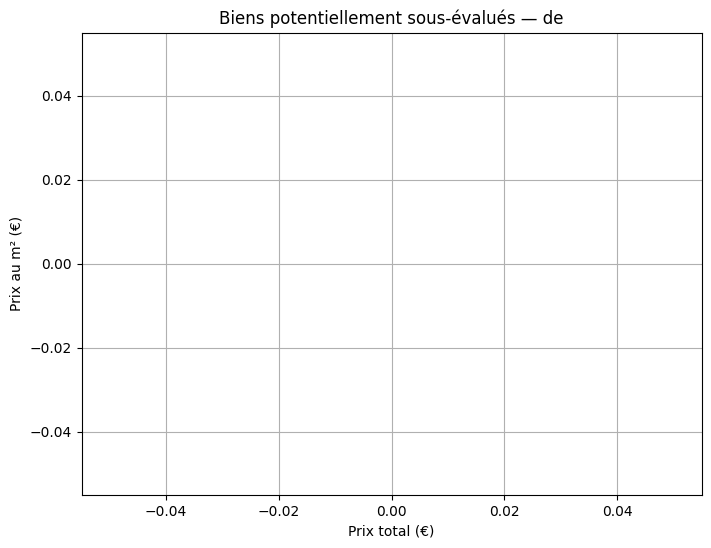

In [ ]:
# x = prix total
# y = prix au m2
# taille des points = surface (idée : voir les gros biens)
plt.figure(figsize=(8, 6))

# scatter coloré par type de bien
plt.scatter(
    df_filtered["prix_total"],
    df_filtered["prix_m2"],
    s=df_filtered["surface_m2"] 
)

# titres et labels
plt.title(f"Biens potentiellement sous-évalués — {type_bien_filtre}")
plt.xlabel("Prix total (€)")
plt.ylabel("Prix au m² (€)")

# petite grille pour lire plus facilement
plt.grid(True)

# affichage
plt.show()

#### Système de scoring : Top 10 opportunités

- Type : Tableau trié interactif
- Objectif : Montrer les 10 meilleures opportunités selon un score calculé.
- Paramètres : Pondération (marge, prix, surface, zone, aide dispo).
- Outils : pandas, ipywidgets, matplotlib
- Besoins couverts : Prioriser les investissements.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Fonction pour calculer un score simple
def calcul_score(df, w_marge, w_prix, w_surface, w_zone, w_aide):
    
    data = df.copy()

    # --- Scores normalisés (0 à 1)

    # Prix/m2 bas = potentiel marge
    data["score_marge"] = 1 - (data["prix_m2"] / data["prix_m2"].max())

    # Prix bas
    data["score_prix"] = 1 - (data["prix_total"] / data["prix_total"].max())

    # Surface grande = mieux
    data["score_surface"] = data["surface_m2"] / data["surface_m2"].max()

    # Zone simple (Paris = top)
    data["score_zone"] = data["departement"].apply(lambda d: 1 if d == 75 else 0.5)

    # Aide dispo (donnée manquante)
    data["score_aide"] = random.choices([0, 1], k=len(data))

    # Score global pondéré
    data["score_total"] = (
        w_marge   * data["score_marge"] +
        w_prix    * data["score_prix"] +
        w_surface * data["score_surface"] +
        w_zone    * data["score_zone"] +
        w_aide    * data["score_aide"]
    )

    # Top 10
    top10 = data.sort_values(by="score_total", ascending=False).head(10)
    return top10

# Interface interactive
def afficher_top10(w_marge, w_prix, w_surface, w_zone, w_aide):

    top10 = calcul_score(df, w_marge, w_prix, w_surface, w_zone, w_aide)

    print("✅ Top 10 des opportunités selon ton score :\n")
    display(top10[["commune", "type_bien", "surface_m2", "prix_total", "prix_m2", "score_total"]])

    # Graphique barres
    plt.figure(figsize=(9,4))
    plt.bar(top10["commune"], top10["score_total"])
    plt.xticks(rotation=45)
    plt.title("Top 10 immobilier (score pondéré)")
    plt.ylabel("Score")
    plt.show()

# Widgets sliders (pondération)
interact(
    afficher_top10,
    w_marge   = FloatSlider(value=1, min=0, max=2, step=0.1, description="Marge"),
    w_prix    = FloatSlider(value=1, min=0, max=2, step=0.1, description="Prix"),
    w_surface = FloatSlider(value=1, min=0, max=2, step=0.1, description="Surface"),
    w_zone    = FloatSlider(value=1, min=0, max=2, step=0.1, description="Zone"),
    w_aide    = FloatSlider(value=1, min=0, max=2, step=0.1, description="Aides"),
);
